<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/deeplearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Corrected spelling of MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.7871 - loss: 0.6714 - val_accuracy: 0.9828 - val_loss: 0.0630
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9654 - loss: 0.1125 - val_accuracy: 0.9873 - val_loss: 0.0419
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9739 - loss: 0.0872 - val_accuracy: 0.9875 - val_loss: 0.0448
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9812 - loss: 0.0642 - val_accuracy: 0.9888 - val_loss: 0.0400
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9836 - loss: 0.0554 - val_accuracy: 0.9917 - val_loss: 0.0295


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0340
Test Accuracy 0.9898999929428101


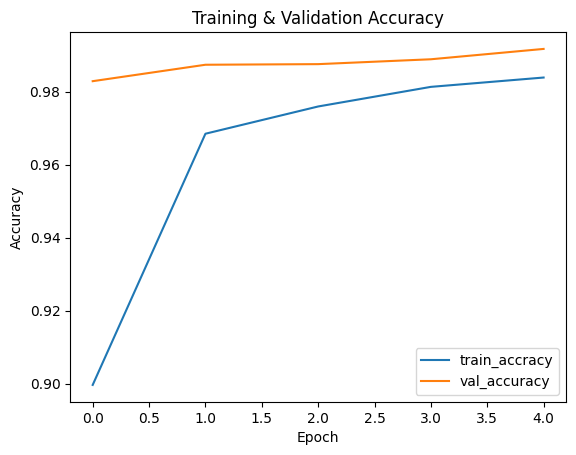

In [ ]:
plt.plot(history.history['accuracy'],label='train_accracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()